### Agora nosso objetivo é automatizar o reconhecimento de caracteres numéricos. <br><br> Para isso, usaremos uma técnica chamada Deep Learning (aprendizado profundo).<br><br>Atualmente, a biblioteca mais popular de Deep Learning é o Tensorflow, desenvolvido pelo Google
Obs: Entender o funcionamento de uma rede neural é pré-requisito para entender esse algoritmo.

#### Começamos importando as bibliotecas necessárias:

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data    
%matplotlib inline

C:\Users\lbour\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Usaremos o famoso dataset MNIST que contém imagens digitalizadas de números manuscritos que serão usadas para treinar nosso modelo. <br>Um 'label' está associada  a cada imagem do dataset. Usaremos esse label ou etiqueta no formato 'one_hot' que poderia ser interpretada como<br> uma lista contendo a informação sobre qual número aquela 
imagem corresponde. <br>A lista contém 10 elementos, sendo 9 'zeros' e 1 'um'. O índice correspondente ao elemento 1
é o dígito que está contido na imagem.<br>
Exemplos:<br><center>
    0   ==>   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]<br>
    3   ==>   [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]<br>
    9   ==>   [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]<br>

In [2]:
mnist = input_data.read_data_sets(".", one_hot = True)

Extracting .\train-images-idx3-ubyte.gz
Extracting .\train-labels-idx1-ubyte.gz
Extracting .\t10k-images-idx3-ubyte.gz
Extracting .\t10k-labels-idx1-ubyte.gz


#### Cada amostra de input é uma figura de 28x28 pixels com o desenho manuscrito de um dígito. Pegaremos um exemplo do dataset,  para fornecer uma amostra do input

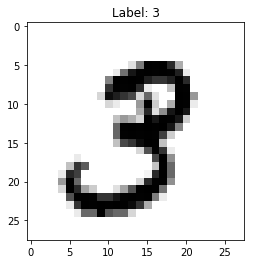

In [3]:
exemplo = mnist.train.images[1].reshape(28,28)
plt.imshow(exemplo, cmap='gray_r')
plt.title('Label: {}'.format(np.argmax(mnist.train.labels[1])))

#### Começamos a nos concentrar na elaboração do modelo. O primeiro passo é definir os parâmetros:

In [4]:
taxa_de_aprendizagem = .01   # velocidade com que o nosso algoritmo vai aprender, normalmente são usados valores baixos já que
                             # faremos várias iterações no modelo. Valores altos frequentemente levam a piores resultados

epocas = 200                 # quantidade de iterações
lote = 100                   # dividimos nosso dataset em 'x' lotes para que nosso computador consiga dar conta do processamento
exibicao = 10                # exibir informações a cada 'x' épocas

n_input = 784                # tamanho do input: 28 * 28
n_classes = 10               # número de classes possíveis: de 0 a 9

n_camada_oculta = 256        # quantidade de neurônios da camada oculta

#### Iniciamos pesos e viéses do modelo com valores aleatórios entre -1 e 1

In [5]:
pesos_camada_oculta = tf.Variable(tf.random_normal([n_input, n_camada_oculta]))
pesos_output = tf.Variable(tf.random_normal([n_camada_oculta, n_classes]))

vies_camada_oculta = tf.Variable(tf.random_normal([n_camada_oculta]))
vies_output = tf.Variable(tf.random_normal([n_classes]))

#### Placeholder é uma variável que iremos atribuir dado em algum momento posterior. Isso permite que possamos criar nossa operações e construir nosso grafo sem precisar dos dados a priori

In [10]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, n_classes])

Realizamos as operações necessárias e utilizamos a função de ativação Relu

Relu é uma função que retorna 0 para valores negativos e o próprio valor para números não negativos. Exemplo:
<code><center>
def relu(x):
    if x < 0:
        return 0
else:
        return x

In [11]:
camada_oculta = tf.add(tf.matmul(x, pesos_camada_oculta), vies_camada_oculta)
camada_oculta = tf.nn.relu(camada_oculta)

logits = tf.add(tf.matmul(camada_oculta, pesos_output), vies_output)

#### Definir a perda (ou custo) e o otimizador (Gradiente Descendente)

In [12]:
perda = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))

otimizador = tf.train.GradientDescentOptimizer(learning_rate=taxa_de_aprendizagem).minimize(perda)

#### INICIAR A SESSÃO E CALCULAR A ACURÁCIA DAS NOSSA PREVIÇÕES


In [13]:
init = tf.global_variables_initializer() # iniciailiza as variáveis globais


with tf.Session() as sess:
    sess.run(init)
    
    ### CICLOS DE TREINAMENTO
    for epoca in range(epocas):
        lote_total = int(mnist.train.num_examples/lote)
        
        for i in range(lote_total):
            lote_x, lote_y = mnist.train.next_batch(lote)
            
            # Executar otimização e calcular perda
            sess.run(otimizador, feed_dict={x: lote_x, y:lote_y})
      
        if epoca % exibicao == 0:
            c = sess.run(perda, feed_dict={x: lote_x, y: lote_y})
            print("Época:", '%04d' % (epoca+1), "custo=", \
                "{:.3f}".format(c))
            
    ### TESTAR O MODELO
    previsoes_corretas = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))

    ### CALCULAR ACURÁCIA
    acuracia = tf.reduce_mean(tf.cast(previsoes_corretas, "float"))

    test_size = 256
    print("\n ACURÁCIA ==>  ", acuracia.eval({x: mnist.test.images[:test_size], y: mnist.test.labels[:test_size]}))

Época: 0001 custo= 5.352
Época: 0011 custo= 2.775
Época: 0021 custo= 2.158
Época: 0031 custo= 1.287
Época: 0041 custo= 0.218
Época: 0051 custo= 0.591
Época: 0061 custo= 0.311
Época: 0071 custo= 0.142
Época: 0081 custo= 0.518
Época: 0091 custo= 0.006
Época: 0101 custo= 0.009
Época: 0111 custo= 0.011
Época: 0121 custo= 0.658
Época: 0131 custo= 0.006
Época: 0141 custo= 0.075
Época: 0151 custo= 0.109
Época: 0161 custo= 0.011
Época: 0171 custo= 0.003
Época: 0181 custo= 0.009
Época: 0191 custo= 0.023

 ACURÁCIA ==>   0.9375


.

<b>FONTES: <br>
    - https://www.tensorflow.org/get_started/mnist/beginners)
    - https://www.oreilly.com/learning/not-another-mnist-tutorial-with-tensorflow
